<a href="https://colab.research.google.com/github/Taosif041/Digital-Image-Processing/blob/main/BSIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

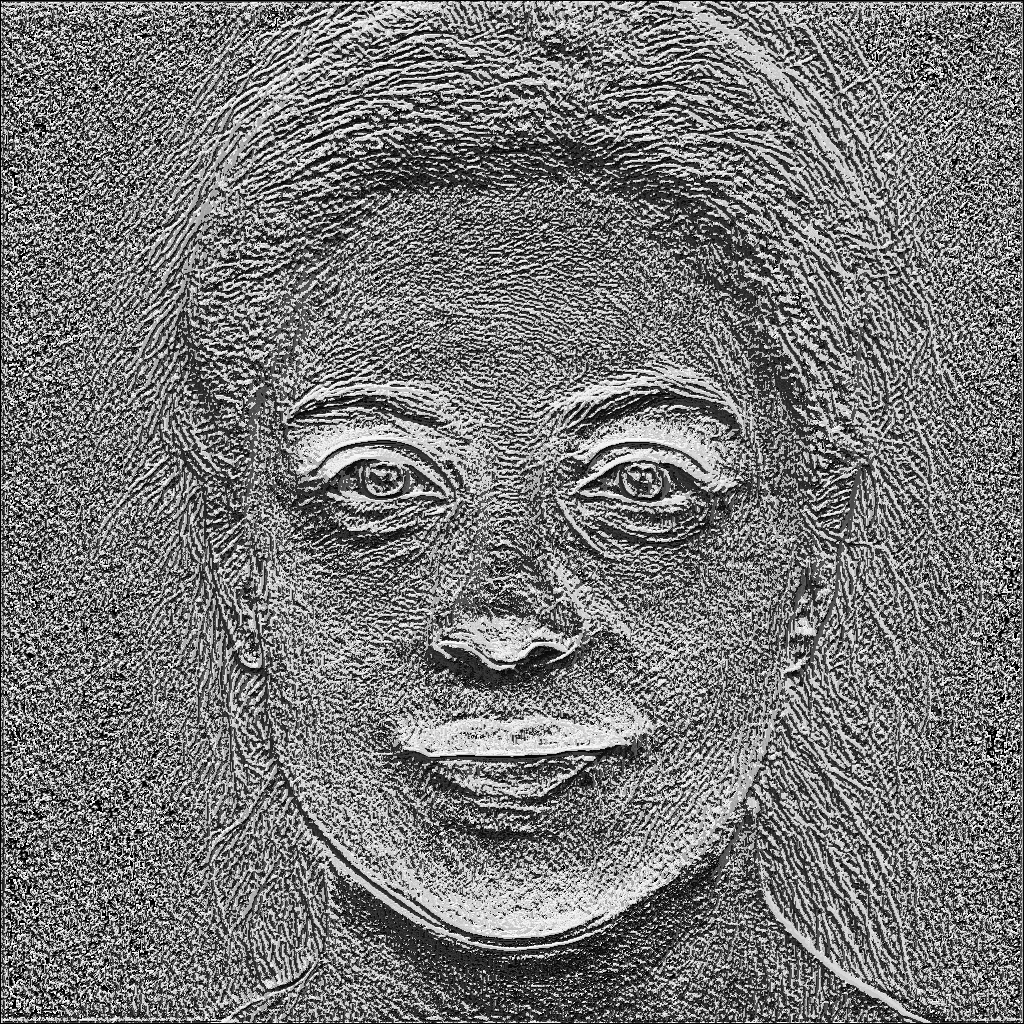

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def bsif(image, neighborhood_size=3):
    # Ensure the neighborhood size is odd
    if neighborhood_size % 2 == 0:
        raise ValueError("Neighborhood size should be odd.")

    # Load and convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create an empty output image of the same size
    output_image = np.zeros_like(gray_image, dtype=np.uint8)

    # Define the range for neighborhood search
    half_size = neighborhood_size // 2

    # Iterate over the image
    for i in range(half_size, gray_image.shape[0] - half_size):
        for j in range(half_size, gray_image.shape[1] - half_size):
            # Extract the local neighborhood
            neighborhood = gray_image[i - half_size:i + half_size + 1, j - half_size:j + half_size + 1]

            # Compute the mean intensity of the neighborhood
            neighborhood_mean = np.mean(neighborhood)

            # Binarize the neighborhood based on intensity comparison
            binary_pattern = (neighborhood > neighborhood_mean).astype(np.uint8)

            # Convert the binary pattern to decimal and set it as the output pixel
            output_image[i, j] = int(''.join(map(str, binary_pattern.flatten())), 2)

    return output_image

# Load an example image (e.g., using OpenCV)
image = cv2.imread('/content/001_08-vs-039_08.png')

# Apply BSIF to the image
bsif_result = bsif(image)

# Display the result using cv2_imshow
cv2_imshow(bsif_result)
cv2.waitKey(0)
cv2.destroyAllWindows()


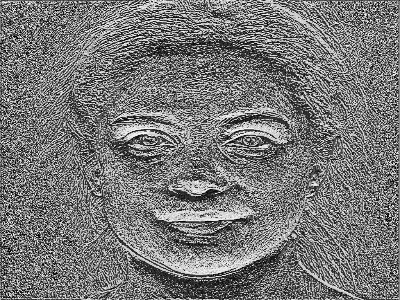

In [9]:
newimg= cv2.resize(bsif_result, (400,300))
cv2_imshow(newimg)


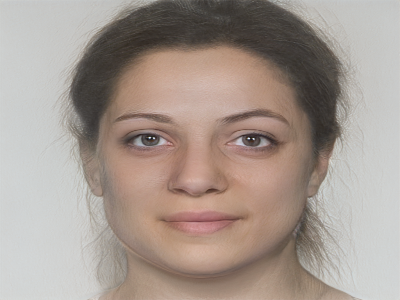

In [10]:
newimg2= cv2.resize(image, (400,300))
cv2_imshow(newimg2)
